# __MONKEYPOX PREDICTION__

# 1. BUSINESS UNDERSTANDING

## Overview

Monkeypox, according to the Centers for Disease Control and Prevention, is an uncommon disease caused by infection with the monkeypox virus. Monkeypox virus is part of the same family of viruses as variola virus, the virus that causes smallpox. Monkeypox symptoms are similar to smallpox symptoms, but milder, and monkeypox is rarely fatal.
Monkeypox was discovered in 1958 when two outbreaks of a pox-like disease occurred in colonies of monkeys kept for research. Despite being named “monkeypox,” the source of the disease remains unknown. However, African rodents and non-human primates (like monkeys) might harbor the virus and infect people.

The first human case of monkeypox was recorded in 1970. Prior to the 2022 outbreak in May, monkeypox had been reported in people in several central and western African countries. Previously, almost all monkeypox cases in people outside of Africa were linked to international travel to countries where the disease commonly occurs or through imported animals. These cases occurred on multiple continents.

```Transmission```: Monkeypox is a viral zoonosis (virus transmitted to humans from animals)It is transmitted through close contact with an infected person or animal, body fluids, respiratory droplets and contaminated materials such as bedding.

## Problem Statement

As more cases of monkeypox emerge, the world becomes increasingly concerned, as they do not want a repeat of what happened not too long ago, when the infamous Covid-19 broke out and altered the world as we know it. Faced with the reality that such viral diseases can actually shut down the planet, the organization must develop ways to reduce the spread of this disease, enter the Health authorities in the United Kingdom, they have established an incident management team to coordinate the extensive contact tracing  in regards to how quickly the virus can be transferred and, worse, mutate into a more lethal variant.

On July 23, the World Health Organization declared the outbreak “a public health emergency of international concern.” Another thing you should know about monkeypox is that it is extremely unpleasant. The current strain has a 1% mortality rate, and as of this writing, there have been three deaths reported in outbreaks outside of Africa, and five deaths in African countries where the disease is endemic, since the beginning of the year.
The West African strain of the monkeypox virus is associated with milder disease and fewer deaths than the Central African strain.

Even if the chances of death are low, patients with monkeypox have reported how painful and debilitating the disease is. "People may experience flu-like symptoms at first, such as fever and headache, but as the disease progresses, you get a multi-stage rash, lesions can develop in your mouth, feet, and genital region, and these develop into pus-filled blisters."Symptoms can appear between five and 21 days after infection, though the average incubation period is 6 to 13 days. For the first few days, there are headaches, fever, muscle aches, and fatigue.

As students of the Incident Management team we have been tasked to create a model to accurately identify potential infected persons in order to make contact tracing faster and more efficient, thereby halting the spread.

## Proposed Solution

One proposed solution is to cultivate the use of data in attempting to predict whether or not a person has monkeypox in order to make contact tracing easier.

## Specific Objectives

* To predict whether a patient is negative or positive for monkeypox based on the symptoms they exhibit 
* To analyze the various variables such as Sore Throat,Penile Oedema, Oral Lesions ,Systemic illness and STIs and know their relationship with monkeypox 

## Research Questions

* Which model best predicts monkeypox disease?
* Which symptom has the highest correlation to monkeypox?
* Which symptom has the lowest correlation to monkeypox?

## Success Criteria

Tentatively, the study will be judged a success if, we build a model to predict monkeypox with a recall of 70% or more in classification



## Importing Libraries

Libraries to enhance data manipulation.

These comprises of;
   > **NumPy**
   
   NumPy is an open source project aiming to enable numerical computing with Python.
   
   > **pandas**
   
   pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
    built on top of the Python programming language.   

In [64]:
import pandas as pd
import numpy as np

Libraries for visualization;

   >**Seaborn**
    
   Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
    
   >**Matplotlib**
    
   Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [65]:
import seaborn as sns
# setting the theme
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

Libraries for modelling tasks;

   >**scikit-learn**
   
   Simple and efficient tools for predictive data analysis, accessible to everybody, and reusable in various contexts built on NumPy, SciPy, and matplotlib

In [66]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score ,accuracy_score, plot_confusion_matrix, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE, ADASYN 

Library for saving our final model

In [67]:
import joblib

Library for ignoring deprecation warnings

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

#### Defining relevant Functions.

In [117]:
# function to display the values on the graph
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
# function to plot the pie charts
def univariate(name):
    """ Function to plot the pie charts """

    figure = plt.pie(mp[name].value_counts(), labels = mp[name].unique(),
             startangle = 90, shadow = True, autopct = "%2.1f%%")
    plt.title(name)
    return figure


## Loading Data

In [51]:
# Loading the data using pandas into mp {Monkey Pox}

# Index_col sets the index to be the patient id as there is no need to have more than one unique identifiers.

mp = pd.read_csv('DATA.csv')

# 2. DATA UNDERSTANDING

## Overview

We are using a SYNTHETIC dataset generated from a study published by the British Medical Journal. It is a description of the clinical features and novel presentations of human monkeypox during the outbreak of 2022 in central London. 

The data has already been loaded in the above code cell.

In [52]:
# preview of the first 5 rows
mp.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [55]:
# Checking the summary of the data

mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [54]:
# checking for duplicates using the index as a guide as the index is the personal id
mp.duplicated().sum()

0

In [56]:
# viewing the column names of the dataset 

mp.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [58]:
# checking the summary statistics of the data
mp.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [59]:
# shape of the data
mp.shape

(25000, 11)

In [101]:
# Checking on the uniue value counts in Systemic Illness
mp['Systemic_Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic_Illness, dtype: int64

In [102]:
# Reducing ambiguity in the systemic illness column we change none to No systemic Illness

mp['Systemic_Illness'].replace(to_replace= 'None',value= 'No_Systemic_Illness',inplace= True)

In [103]:
# confirming
mp['Systemic_Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
No_Systemic_Illness      6216
Muscle Aches and Pain    6150
Name: Systemic_Illness, dtype: int64

__Summary__

* Our data has 25,000 rows and 11 columns
* The data has 8 columns of dtype ```Bool``` and 2 columns of dtype ```object```.
* There are no missing columns in the data.
* There are no duplicates in the data.
* One column in particular will be dropped `Patient_ID` as the patient id wont be helpful in the modeling as it will only add noise for the machine.
* Uniformity of column names will also be done to reduce ambiguity.
* The following are the relevant columns in our data;
    * Systemic Illness 
    * Rectal Pain 
    * Sore Throat 
    * Penile Oedema
    * Oral Lesions 
    * Solitary Lesion 
    * Swollen Tonsils 
    * HIV Infection
    * Sexually Transmitted Infection
    * MonkeyPox
    


Systemic illness has the most value counts after Patient_ID with 4.

data cleaning will be relatievly easy as the data has no missing values and no duplicates.


Since the data has no duplicates and missing values, we can go ahead and perfom column name uniforminty, type casting. and drop the `Patient_ID` before starting on Exploratory Data Analysis to gain more insights from the data.

### Dropping Patient ID

In [104]:
# dropping the patient id
mp.drop(columns=['Patient_ID'],axis = 1, inplace=True)
mp.head(3)

KeyError: "['Patient_ID'] not found in axis"

### Uniformity of Column names

In [71]:
# replacing the names
mp.rename(columns={'Systemic Illness':'Systemic_Illness',
                        'Rectal Pain':'Rectal_Pain',
                        'Sore Throat':'Sore_Throat',
                        'Penile Oedema':'Penile_Oedema',
                        'Oral Lesions':'Oral_Lesions',
                        'Solitary Lesion':'Solitary_Leision',
                        'Swollen Tonsils':'Swollen_Tonsils',
                        'HIV Infection':'HIV_Infection',
                        'Sexually Transmitted Infection':'STI',
                        'MonkeyPox':'Target'},inplace=True)
mp.head(3)

,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive


### Type casting Objects to Categorical data types

In [107]:
# For loop to get all object types in the data frame
col_obj = []
for x in list(mp.columns):
    if mp[x].dtypes == object:
        col_obj.append(x)
col_obj        

['Systemic_Illness', 'Target']

In [108]:
# type_casting object to categorical 

mp[col_obj] = mp[col_obj].astype('category')

# confirming
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Systemic_Illness  25000 non-null  category
 1   Rectal_Pain       25000 non-null  bool    
 2   Sore_Throat       25000 non-null  bool    
 3   Penile_Oedema     25000 non-null  bool    
 4   Oral_Lesions      25000 non-null  bool    
 5   Solitary_Leision  25000 non-null  bool    
 6   Swollen_Tonsils   25000 non-null  bool    
 7   HIV_Infection     25000 non-null  bool    
 8   STI               25000 non-null  bool    
 9   Target            25000 non-null  category
dtypes: bool(8), category(2)
memory usage: 244.6 KB


## Exploratory Data Analysis

### UNIVARIATE ANALYSIS

__Feature columns__

In univariate analysis, we will investigate the distribution of symptoms using pie charts.

In [109]:
# Making a list of column names to use in the notebook
col = list(mp.columns)

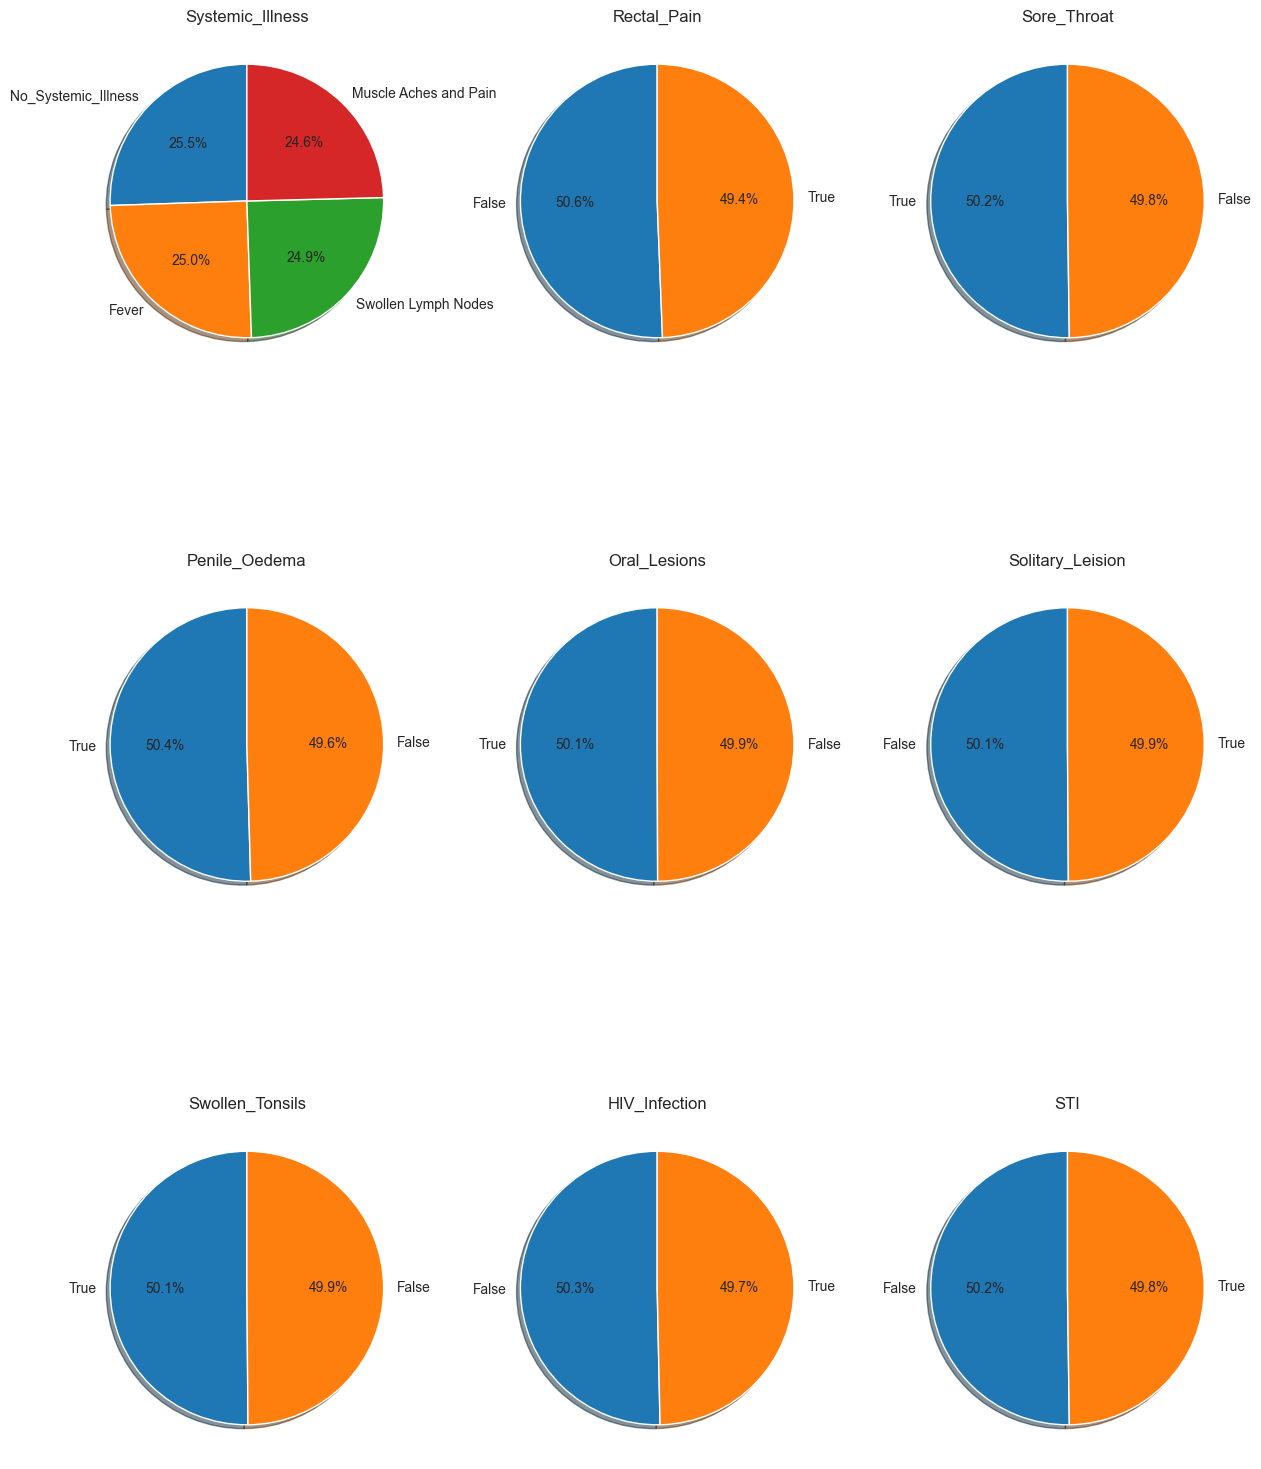

In [110]:
# columns to use when plotting the pie charts
columns =  col[:-1]

# plotting the pie charts
plt.figure(figsize = (15, 20))
for i in enumerate(columns):
    plt.subplot(3, 3, i[0] + 1)
    univariate(i[1])

__Target Column__

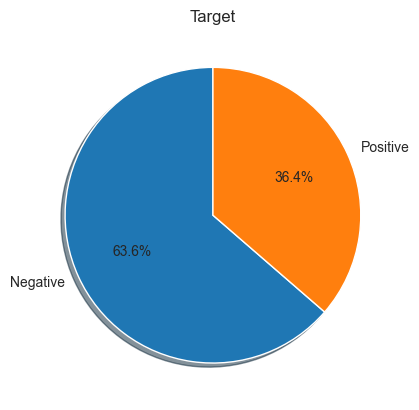

In [111]:
univariate("Target");

__Univariate Analysis summary__

* From the above, all symptoms have an almost uniform distribution based on whether it is true or false.
* For the target column, 63.6% of the data consists of those who are monkeypox negative and 36.4% are those who are monkeypox positive therefore there is a class imbalance in our target column.

### BIVARIATE ANALYSIS

In Bivariate analysis, we will compare the feature columns to our target variable to see the relationship between the two.
This will be achieved by plotting side by side bar charts to see the relationship.

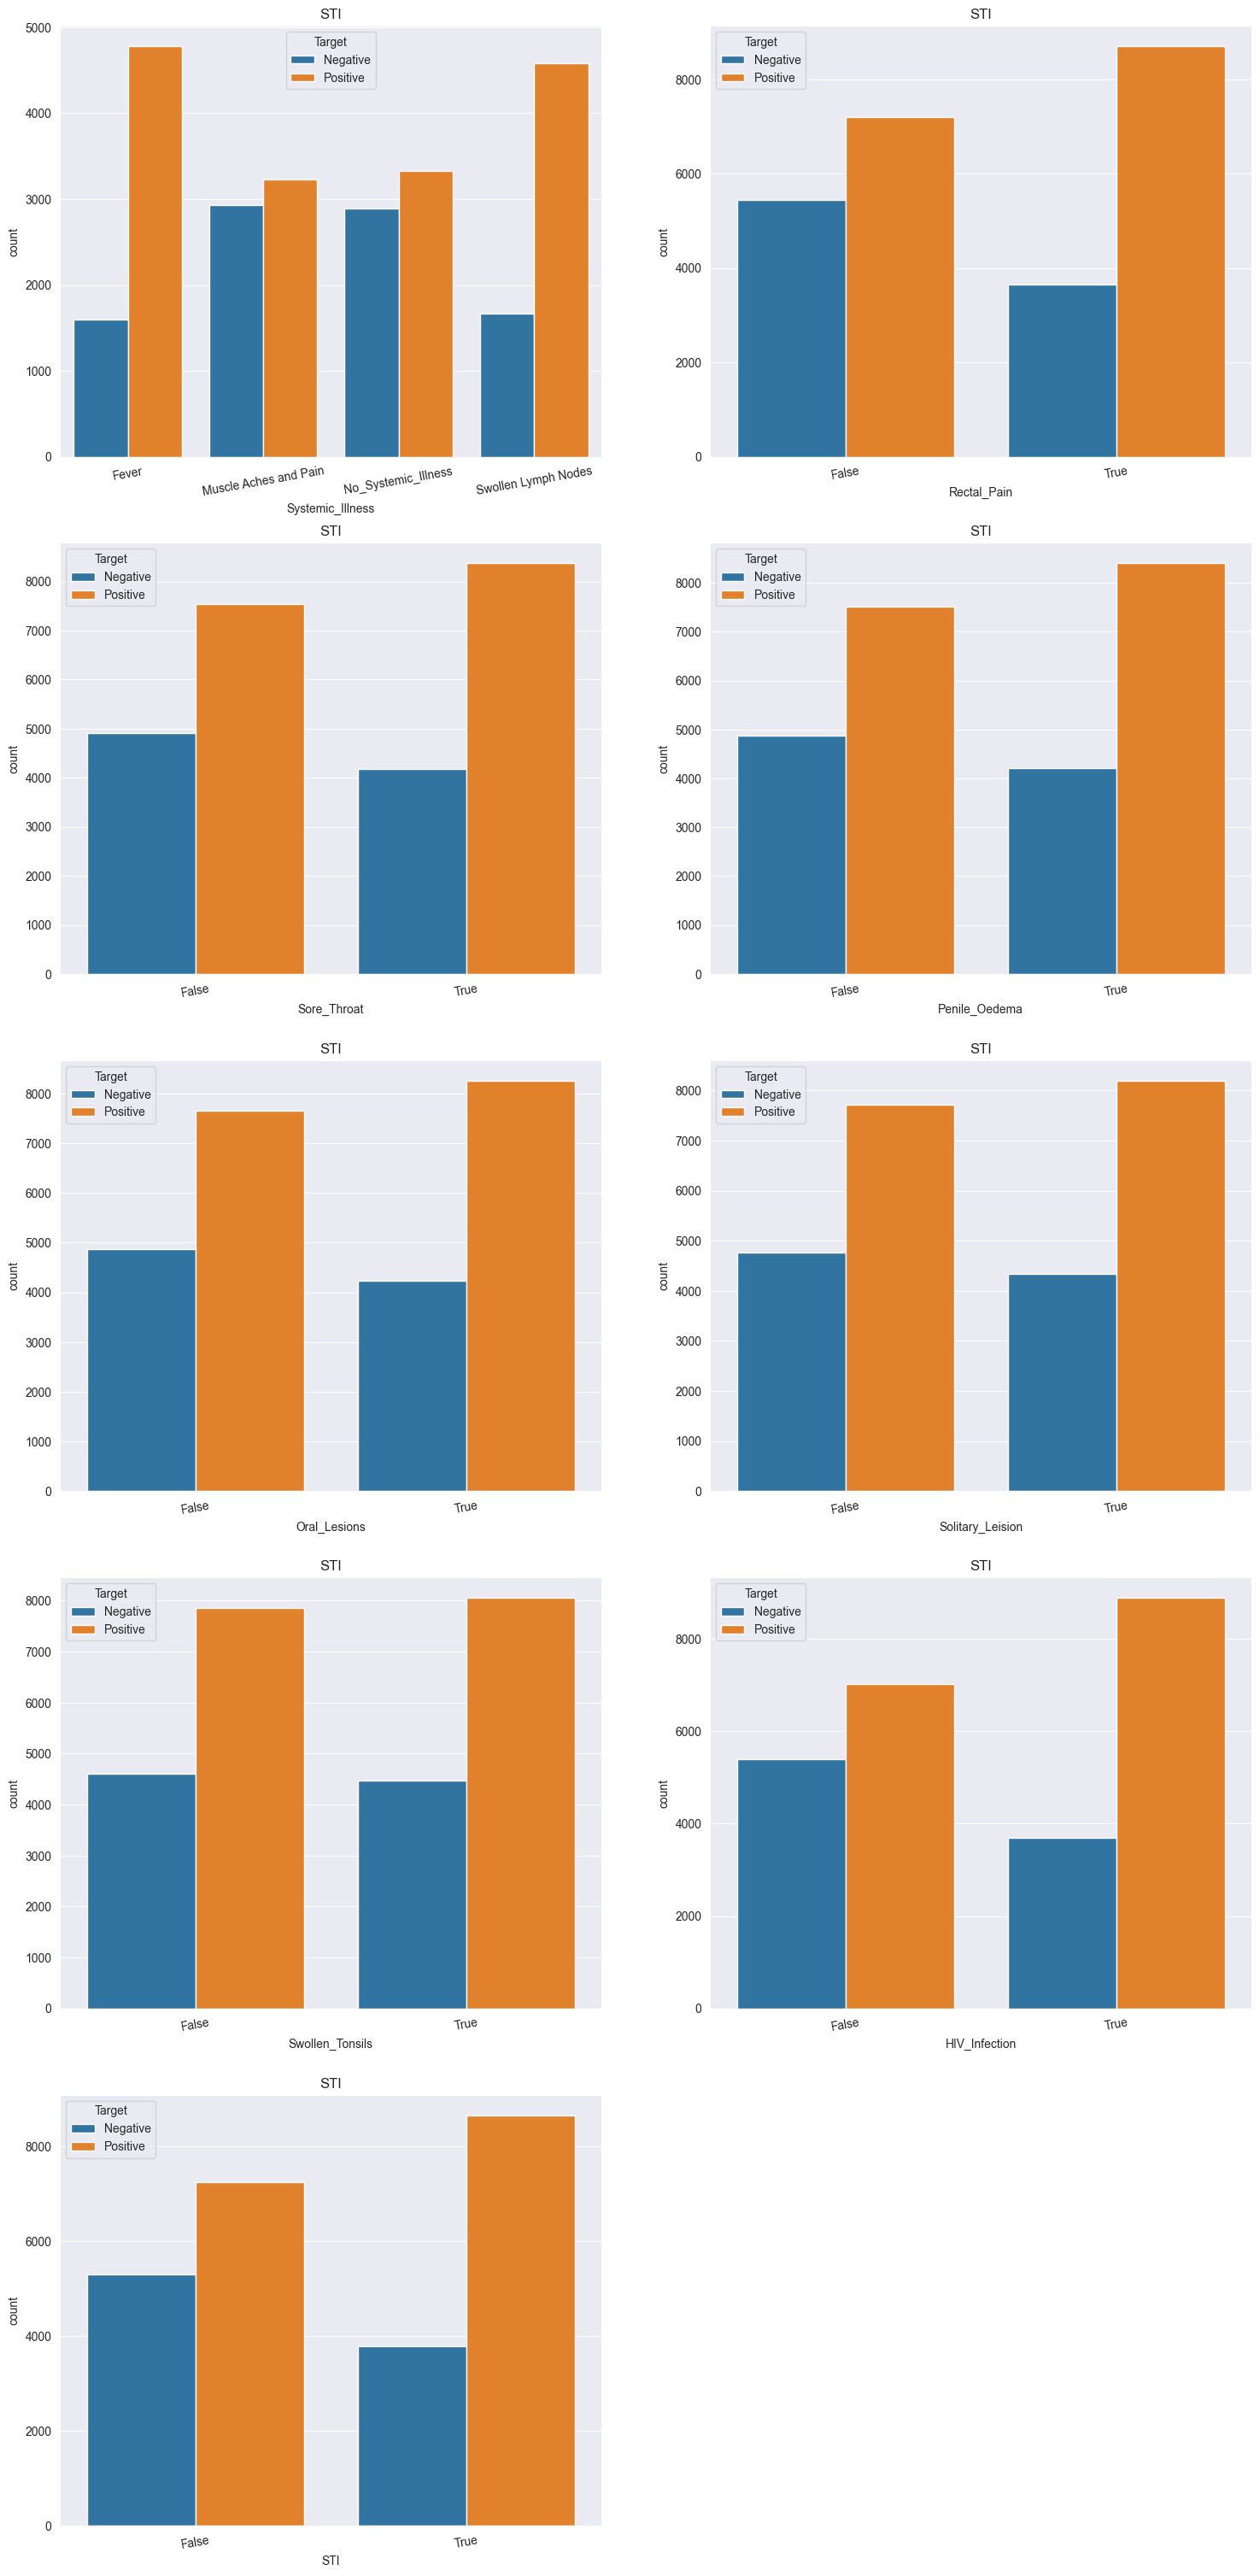

In [112]:
# Plotting side by side graphs for the bivariate analysis

features = col[:-1]
plt.figure(figsize = (18, 38))
for idx,val in enumerate(features):
    plt.subplot(5, 2, idx + 1)
    sns.countplot(x = val, hue = "Target", data = mp )
    plt.xticks(rotation = 10)
    plt.title(i[1].upper())
    
    

__Bivariate Analysis Summary__

* For the systemic illness symptoms, people with ```fever``` and ```swollen lymph nodes``` have a high chance of being MonkeyPox positive.
* People with the symptoms of ```HIV Infection```, ```Rectal Pain``` and ```Sexually Transmitted Infection``` also have a high chance of being MonkeyPox positive.
* They all 

### INVESTIGATING CORRELATION

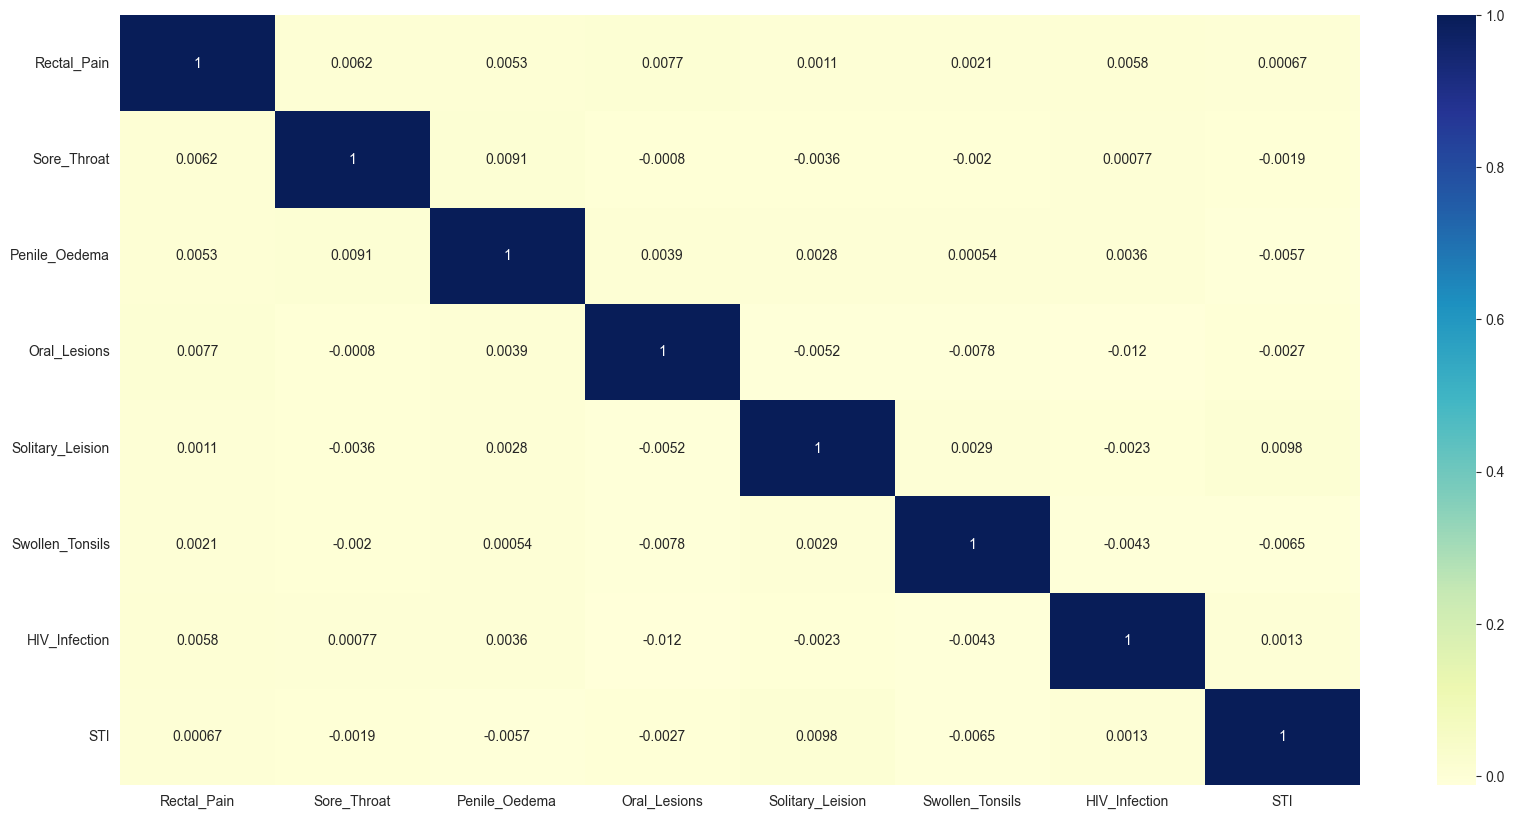

In [97]:
plt.figure(figsize = (20, 10))
var = mp.corr()
sns.heatmap(var, annot = True, cmap = "YlGnBu");

No high correlation was observed in the dataset.

# 3. DATA PREPARATION

Now that we have finished with EDa. We should prepare the data `mp` for modeling by one hot encoding to get binary column.


In [113]:
col

['Systemic_Illness',
 'Rectal_Pain',
 'Sore_Throat',
 'Penile_Oedema',
 'Oral_Lesions',
 'Solitary_Leision',
 'Swollen_Tonsils',
 'HIV_Infection',
 'STI',
 'Target']

In [116]:
# type casting Systemic illness by using get dummies
df = pd.get_dummies(data= mp, columns= ['Systemic_Illness'],drop_first= False)
# dropping every other column to isolate the systemic illness ...will concat later.
df_Systemic = df.drop(columns= col[1:],axis = 1)
# df_Systemic = df_Systemic.drop(columns= ['Systemic Illness_No Systemic Illness'],axis = 1)
df_Systemic

,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_No_Systemic_Illness,Systemic_Illness_Swollen Lymph Nodes
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
24995,0,0,1,0
24996,1,0,0,0
24997,0,0,1,0
24998,0,0,0,1


In [27]:
# drop_first is set to true to reduce on multicoliniearity
df_d = pd.get_dummies(data = mp, columns= col[1:], drop_first= True)
df_d

,Systemic Illness,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,
P0,No Systemic Illness,0,1,1,1,0,1,0,0,0
P1,Fever,1,0,1,1,0,0,1,0,1
P2,Fever,0,1,1,0,0,0,1,0,1
P3,No Systemic Illness,1,0,0,0,1,1,1,0,1
P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
P24995,No Systemic Illness,1,1,0,1,1,0,0,1,1
P24996,Fever,0,1,1,0,1,1,1,1,1
P24997,No Systemic Illness,1,1,0,0,1,1,0,0,1


In [28]:
# Dropping Systemic illness as its already dummied out

df_d.drop(axis = 1, columns= ['Systemic Illness'] ,inplace = True)


In [29]:
# Column names will have to be changed but that can be done in one go
# first we finish up on converting the column data types t a usable state.
df_d.head()

,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,
P0,0,1,1,1,0,1,0,0,0
P1,1,0,1,1,0,0,1,0,1
P2,0,1,1,0,0,0,1,0,1
P3,1,0,0,0,1,1,1,0,1
P4,1,1,1,0,0,1,1,0,1


In [30]:
df_clean = pd.concat([df_Systemic,df_d], axis = 1,join= 'inner')
df_clean

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,,,
P0,0,0,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,0,1,0,0,0,1,1,1,0,1
P4,0,0,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
P24995,0,0,0,1,1,0,1,1,0,0,1,1
P24996,1,0,0,0,1,1,0,1,1,1,1,1
P24997,0,0,0,1,1,0,0,1,1,0,0,1


In [31]:
list(df_clean.columns)

['Systemic Illness_Fever',
 'Systemic Illness_Muscle Aches and Pain',
 'Systemic Illness_Swollen Lymph Nodes',
 'Rectal Pain_True',
 'Sore Throat_True',
 'Penile Oedema_True',
 'Oral Lesions_True',
 'Solitary Lesion_True',
 'Swollen Tonsils_True',
 'HIV Infection_True',
 'Sexually Transmitted Infection_True',
 'MonkeyPox_Positive']

In [32]:
mp.rename(columns={'Systemic Illness_Fever':'SI_Fever',
                        'Systemic Illness_Muscle Aches and Pain':'SI_Muscle_Aches&Pain',
                        'Systemic Illness_Swollen Lymph Nodes':'SI_Swollen_Lymph_Nodes',
                        'Rectal Pain_True':'Rectal_Pain',
                        'Sore Throat_True':'Sore_Throat',
                        'Penile Oedema_True':'Penile_Oedema',
                        'Oral Lesions_True':'Oral_Lesions',
                        'Solitary Lesion_True':'Solitary_Leision',
                        'Swollen Tonsils_True':'Swollen_Tonsils',
                        'HIV Infection_True':'HIV_Infection',
                        'Sexually Transmitted Infection_True':'STI',
                        'MonkeyPox_Positive':'Target'},inplace=True)

,SI_Fever,SI_Muscle_Aches&Pain,SI_Swollen_Lymph_Nodes,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
Patient_ID,,,,,,,,,,,,
P0,0,0,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,0,1,0,0,0,1,1,1,0,1
P4,0,0,1,1,1,1,0,0,1,1,0,1
P5,0,0,1,0,1,0,0,0,0,0,0,0
P6,1,0,0,0,1,0,0,0,0,1,0,1
P7,1,0,0,1,1,0,1,1,1,0,0,1
P8,0,1,0,0,1,1,1,0,0,0,0,1


In [33]:
# splitting the data into X [predictors] and y [target]
X = df_clean.drop(columns= ['Target'],axis = 1)
y = df_clean['Target']

# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size= 0.3,stratify= y)

# 4. MODELLING

In [34]:
#checking class balance in the trainaing target variable
print(y_train.value_counts())
print('\n')

#checking class balance in the trainaing target variable
print(y_test.value_counts())

1    11136
0     6364
Name: Target, dtype: int64


1    4773
0    2727
Name: Target, dtype: int64


# Base Model

In [35]:
#function to train model and return the score
def model_trainer(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    pre = model.predict(X_te)
    precision =precision_score(y_te, pre)
    recall =recall_score(y_te, pre)
    accuracy =accuracy_score(y_te, pre)
    f1 = f1_score(y_te, pre)
    
    return {'precision':precision,
            'recall_score':recall,
            'accuracy_score':accuracy,
            'f1_score':f1}

In [36]:
#train and get the score of the base model without handling the imbalance in the class and see how the model performs
base_tree =  DecisionTreeClassifier()
model_trainer(base_tree, X_train, y_train,X_test,y_test)

{'precision': 0.7076757532281205,
 'recall_score': 0.8267337104546407,
 'accuracy_score': 0.6724,
 'f1_score': 0.7625857570779785}

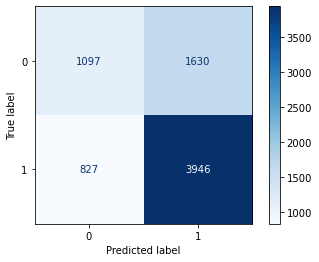

In [37]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree, X_test, y_test, cmap=plt.cm.Blues)

In [38]:
#balance the training classes and see the effect on the model using SMOTE
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

print(y_train_smote.value_counts())


1    11136
0    11136
Name: Target, dtype: int64


In [39]:
#retrain the model with the model with the balanced classes
base_tree_smote = DecisionTreeClassifier()
Basemodel_balanced = model_trainer(base_tree_smote, X_train_smote, y_train_smote,X_test,y_test)
Basemodel_balanced


{'precision': 0.7404202719406675,
 'recall_score': 0.6274879530693485,
 'accuracy_score': 0.6229333333333333,
 'f1_score': 0.679292356543434}

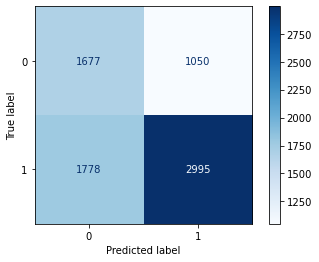

In [40]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree_smote, X_test, y_test, cmap=plt.cm.Blues)

In [41]:
#function to tune the model and find best parameters for the DecisionTreeClassifier using gridSearchCv
def grid_search(model, parms, X_tr, y_tr):
  gs_tree = GridSearchCV(model, parms, cv=3)
  gs_tree.fit(X_tr, y_tr)

  return gs_tree.best_params_

In [42]:
#balanced class best perameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
  }
grid_search(DecisionTreeClassifier(),param_grid, X_train_smote, y_train_smote)


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [43]:
dtree_par =  DecisionTreeClassifier(criterion= 'entropy', max_depth = 10, min_samples_split= 10)
DecisionTree = model_trainer(dtree_par, X_train_smote,y_train_smote, X_test,y_test)
DecisionTree

{'precision': 0.7386992619926199,
 'recall_score': 0.6710664152524618,
 'accuracy_score': 0.6396,
 'f1_score': 0.703260511581952}

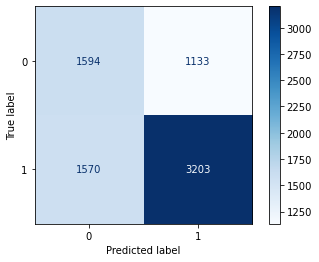

In [44]:
cnf_matrix  = plot_confusion_matrix(dtree_par, X_test, y_test, cmap=plt.cm.Blues)

The model recall score increased meaning more positive patients were identified but there are still many wrongly classified petients too 


In [45]:
#evaluating the two more models and see if they perform better then the DecisionTreeClassifier
# these two are LogisticRegression() and KNeighborsClassifier()

logreg = LogisticRegression()
knn = KNeighborsClassifier()


In [46]:
models = [logreg,knn]
scores=[]
recall=[]


In [47]:
for i in models:
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train_smote,y_train_smote,cv=3,scoring='recall')
    scores.append(model_cv)
    recall.append(model_cv.mean())
    
    
pd.DataFrame({'model':['Logistic Regression','KNN'],'Recall Score':recall}).set_index('model').sort_values(by='Recall Score',ascending=False)

,Recall Score
model,
KNN,0.777658
Logistic Regression,0.724228


In [48]:
#plot the KNN and virtualize the confussion matrix

kn_base =  KNeighborsClassifier()
model_trainer(kn_base, X_train_smote, y_train_smote,X_test,y_test)

{'precision': 0.702871654620043,
 'recall_score': 0.7538235910328933,
 'accuracy_score': 0.6405333333333333,
 'f1_score': 0.7274565305297209}

In [49]:
#tune the the KNN 
knn_gridSearch = KNeighborsClassifier()

parameters = {'n_neighbors':[5,6,7,8,10],
              'leaf_size':[3,4,5,8,10],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
grid_search(knn_gridSearch, parameters, X_train_smote, y_train_smote)


{'algorithm': 'auto', 'leaf_size': 8, 'n_jobs': -1, 'n_neighbors': 10}

In [50]:
knn_improved = KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 8)
KNeighbors = model_trainer(knn_improved, X_train_smote,y_train_smote, X_test,y_test)
KNeighbors

{'precision': 0.7165660051768766,
 'recall_score': 0.6959983239053007,
 'accuracy_score': 0.6313333333333333,
 'f1_score': 0.7061324264002552}

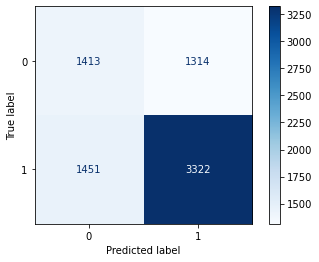

In [51]:
cnf_matrix  = plot_confusion_matrix(knn_improved, X_test, y_test, cmap=plt.cm.Blues)

The KNN Model has improved our recall significantly and this means our model will be able to identify more people with the  virus

In [52]:
#final model the logisticRegressor
base_logrig = LogisticRegression()
model_trainer(base_logrig, X_train_smote, y_train_smote,X_test,y_test)

{'precision': 0.6727592267135325,
 'recall_score': 0.8020113136392206,
 'accuracy_score': 0.6257333333333334,
 'f1_score': 0.7317213036414031}

In [53]:
#performing hyper perameter tuning on the model
logR_improved = LogisticRegression()

parameters = { 'C': np.logspace(-4, 4, 50),
                'penalty' : ['l1', 'l2']}
grid_search(logR_improved, parameters, X_train_smote, y_train_smote)


{'C': 0.0009540954763499944, 'penalty': 'l2'}

In [54]:
logR = LogisticRegression(C = 0.0013894954943731374, penalty ='l2')
LogisticReg = model_trainer(logR, X_train_smote, y_train_smote,X_test,y_test)
LogisticReg

{'precision': 0.6727592267135325,
 'recall_score': 0.8020113136392206,
 'accuracy_score': 0.6257333333333334,
 'f1_score': 0.7317213036414031}

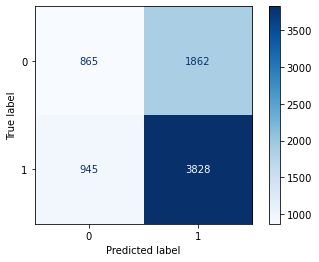

In [55]:
cnf_matrix  = plot_confusion_matrix(logR, X_test, y_test, cmap=plt.cm.Blues)

In [56]:
scores = [LogisticReg, Basemodel_balanced, DecisionTree,KNeighbors, ]
column_name = ['LogisticReg','Basemodel', 'DecisionTree','KNeighbors' ]

In [57]:
df = pd.DataFrame(columns = column_name)
df.LogisticReg =LogisticReg.values()
df.Basemodel = Basemodel_balanced.values()
df.DecisionTree = DecisionTree.values()
df.KNeighbors = KNeighbors.values()

df.index = ['precision', 'recall_score','accuracy_score','f1_score']
df

,LogisticReg,Basemodel,DecisionTree,KNeighbors
precision,0.672759,0.740420,0.738699,0.716566
recall_score,0.802011,0.627488,0.671066,0.695998
accuracy_score,0.625733,0.622933,0.639600,0.631333
f1_score,0.731721,0.679292,0.703261,0.706132


The KNeighborsClassifier had the best sores and since this model will be used in detecting MonkeyPox viruses a high recall is needed then precision since this will prevent the number of false positives making more positive cases to be identified and treated in advance

In [58]:
#develop a final pipline that will be used to train the model on the whole dataset and make the model ready for deployment
#Balance the whole dataset using smote 
X_smote, y_smote = SMOTE().fit_resample(X, y)
y_smote.value_counts()



1    15909
0    15909
Name: Target, dtype: int64

In [59]:
pipeline = Pipeline([('KNN', KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 8))])
pipeline.fit(X_smote,y_smote)

Pipeline(steps=[('KNN',
                 KNeighborsClassifier(leaf_size=4, n_jobs=-1, n_neighbors=8))])

In [60]:
#model performance after training on the whole data
model_trainer(pipeline, X_smote, y_smote,X_test,y_test)


{'precision': 0.7326693227091633,
 'recall_score': 0.7705845380263985,
 'accuracy_score': 0.6750666666666667,
 'f1_score': 0.751148779740631}

In [61]:
#save our model into a pickle
with open('model.pkl', 'wb') as f:
  joblib.dump(pipeline, f)

# 5. EVALUATION

# 6. DEPLOYMENT